# Lista 2 - Equações Diferenciais Parciais I

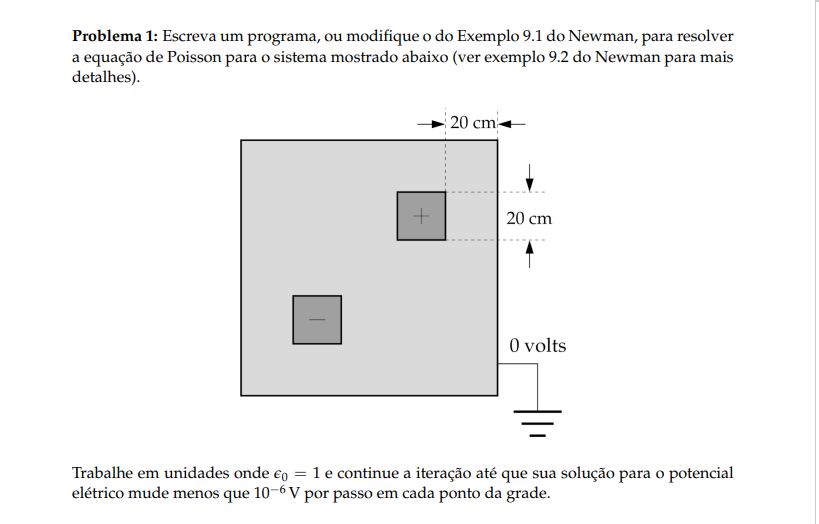

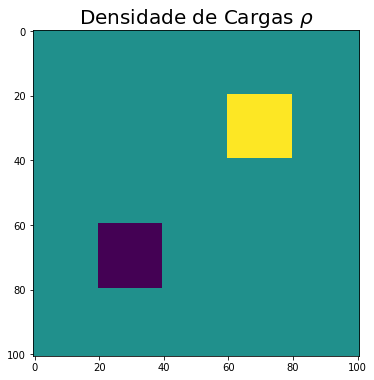

In [4]:
from numpy import zeros,copy
import matplotlib.pyplot as plt
N = 101

ρ = zeros([N,N],float)
for i in range (20,40):
    for j in range(60,80):
        ρ[i,j]=1
for i in range (60,80):
    for j in range(20,40):
        ρ[i,j]=-1

φ = zeros([N,N],float)
φ2 = copy(φ)

fig = plt.figure(figsize=(6,6))
plt.title("Densidade de Cargas $ρ$",fontsize=20)
plt.imshow(ρ)

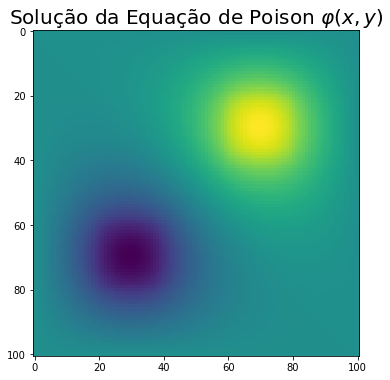

In [5]:
erromax = 10
precisão = 1e-3

while(erromax>precisão):
    erromax=0
    for i in range(1,N-1):
        for j in range(1,N-1):
            
            φ[i,j]=0.25*(φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1]) + 0.25*ρ[i,j]
            erro = abs(φ2[i,j]-φ[i,j])
            if erro>erromax:
                erromax = erro
    φ2 = copy(φ)
    
fig = plt.figure(figsize=(6,6))
plt.title("Solução da Equação de Poison $φ(x,y)$",fontsize=20)    
plt.imshow(φ)

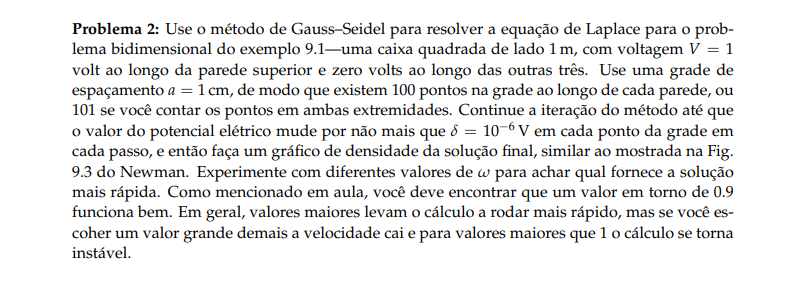

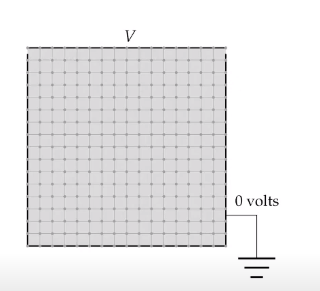

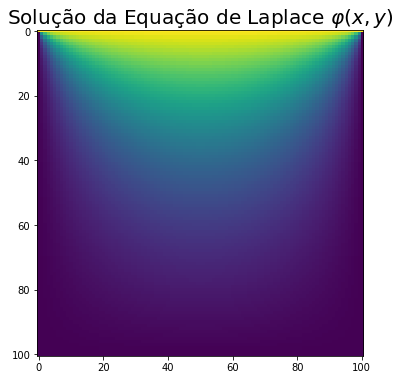

In [7]:
N = 101

φ = zeros([N,N],float)
#condições de contorno:
φ[0,:] = 1

erromax = 10
precisão = 1e-6
ω = 0.9

while(erromax>precisão):
 
    erromax=0
    for i in range(1,N-1):
        for j in range(1,N-1):  
            aux = φ[i,j] 
            φ[i,j]=(1+ω)*0.25*(φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1]) -ω*φ[i,j]
            delta = aux - φ[i,j] 
            erro = abs(delta)
            if erro>erromax:
                erromax = erro
    
fig = plt.figure(figsize=(6,6))
plt.title("Solução da Equação de Laplace $φ(x,y)$",fontsize=20)    
plt.imshow(φ)



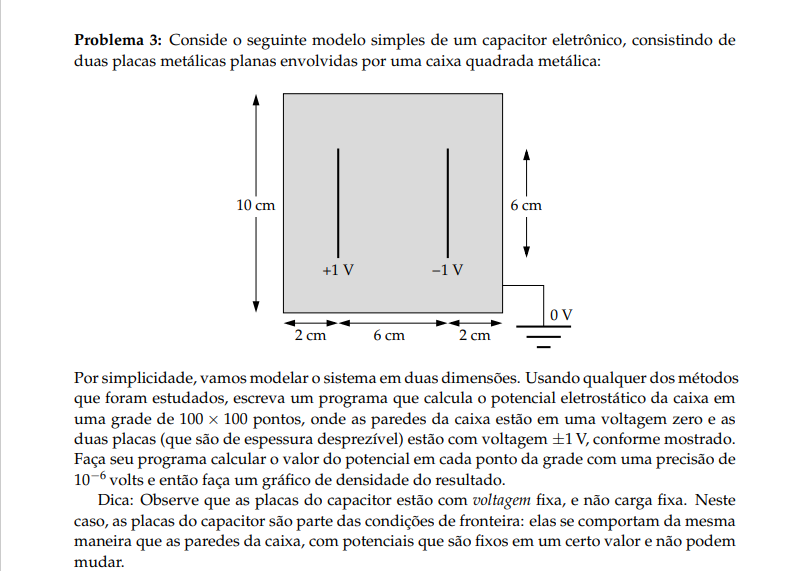

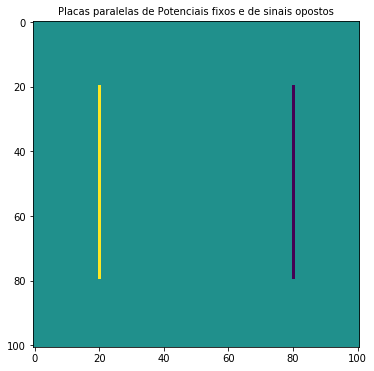

In [8]:
N = 101

φ = zeros([N,N],float)
#condições de contorno:
for i in range(20,80):
        φ[i,20]=1
        φ[i,80]=-1
        
fig = plt.figure(figsize=(6,6))
plt.title("Placas paralelas de Potenciais fixos e de sinais opostos",fontsize=10)
plt.imshow(φ)  

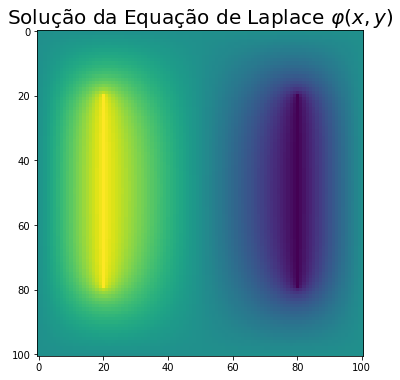

In [10]:
      
erromax = 10
precisão = 1e-6
ω = 0.9

while(erromax>precisão):

    erromax=0
    for i in range(1,N-1):
        for j in range(1,N-1):
            if (i>=20 and i<80)and(j == 20):            
                φ[i,j] = 1
            elif (i>=20 and i<80)and(j==80):
                φ[i,j] = -1
            else:
                aux = φ[i,j] 
                φ[i,j]=(1+ω)*0.25*(φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1]) -ω*φ[i,j]
                delta = aux - φ[i,j] 
                erro = abs(delta)
                if erro>erromax:
                    erromax = erro
    
fig = plt.figure(figsize=(6,6))
plt.title("Solução da Equação de Laplace $φ(x,y)$",fontsize=20)    
plt.imshow(φ)



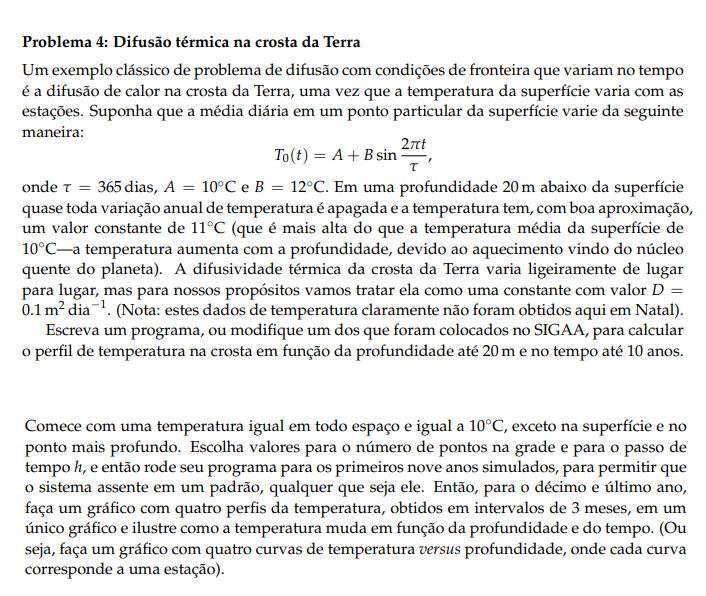

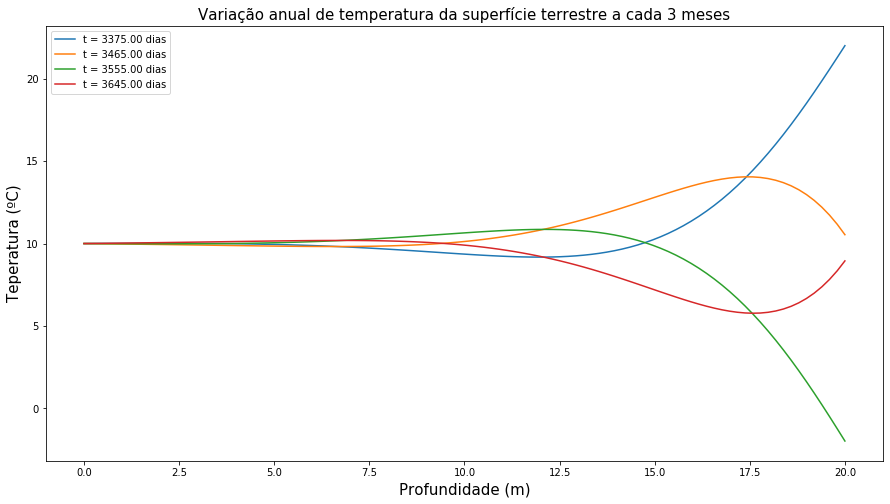

In [26]:
from numpy import ones, linspace, copy,pi,sin
from pylab import*

L = 20
D = 0.1
N = 100
a = L/N
h = 1e-1
eps = h/1000

Tlo = 10
Tmid = 10
Thigh = 11

T = Tmid*ones(N,float)
T[0], T[N-1]= Tlo, Thigh
Tnovo = copy(T)

x = linspace(0,L,N)
t1, t2, t3, t4 = 3375, 3465, 3555, 3645
t = 0.0
fig = plt.figure(figsize = (15,8))
while (t<(t4+eps)):
    for i in range(1,N-1):
        Tnovo[N-1] = 10 + 12*sin(2*pi*t/365)
        Tnovo[i] = T[i] + (h*D/(a**2))*(T[i-1]+T[i+1]-2*T[i])
    t+=h
    T = copy(Tnovo)
    if (abs(t-t1)<=eps) or (abs(t-t2)<=eps) or (abs(t-t3)<=eps) or (abs(t-t4)<=eps):
        
        plot(x,T,label="t = %.2f dias" % t)
        title("Variação anual de temperatura da superfície terrestre a cada 3 meses",fontsize = 15)
        xlabel("Profundidade (m)",fontsize = 15)
        ylabel("Teperatura (ºC)",fontsize = 15)       
        
legend()
plt.show()